<a href="https://colab.research.google.com/github/padong2023/programing_high_level/blob/main/API%EC%82%AC%EC%9A%A9%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#파이썬에서 json 데이터 다루기
형식 = {"키" : "값"}

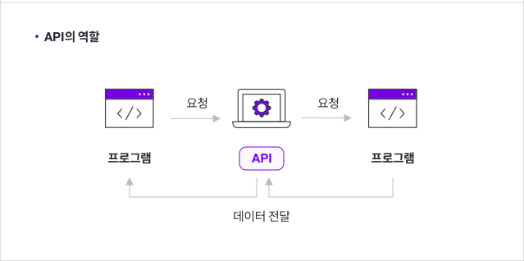

In [ ]:
d={"name" : "혼자 공부하는 데이터분석"}
print(d['name'])

혼자 공부하는 데이터분석


In [ ]:
# 파이썬 객체를 json 문자열로 변환하기 = json.dumps()함수

import json
d_str = json.dumps(d, ensure_ascii=False)
print(d_str)

{"name": "혼자 공부하는 데이터분석"}


In [ ]:
print(type(d_str))

<class 'str'>


In [ ]:
d2=json.loads(d_str)
print(d2['name'])

혼자 공부하는 데이터분석


In [ ]:
d3 = json.loads('{"name":"나은찬", "school":"신성여자고등학교", "class":99}')

In [ ]:
print(d3['name'])
print(d3['school'])
print(d3['class'])

나은찬
신성여자고등학교
99


In [ ]:
d4 = json.loads('{"name":"나은찬", "school":["신성여자고등학교","제주고등학교"], "class":99}')

In [ ]:
print(d4['school'][1])

제주고등학교


In [ ]:
d5_str = """
[
  {"name":"나은찬", "school":"제주고등학교", "year":2022},
  {"name":"김송이", "school":"신성여자고등학교", "year":2022}
]
"""

In [ ]:
d5=json.loads(d5_str)
print(d5[0]['name'])

나은찬


In [ ]:
import pandas as pd
pd.read_json(d5_str)

,name,school,year
0,나은찬,제주고등학교,2022
1,김송이,신성여자고등학교,2022


In [ ]:
print(type(d5_str))

<class 'str'>


#json문자열 -> 파이썬 객체의 형태로 변환

In [ ]:
pd.DataFrame(d5)

,name,school,year
0,나은찬,제주고등학교,2022
1,김송이,신성여자고등학교,2022


In [ ]:
print(type(d5))

<class 'list'>


#파이썬에서 XML 데이터 다루기
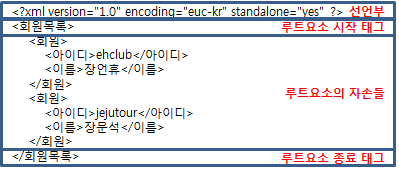

In [ ]:
# xml 문자열을 파이썬 객체로 변환하기 : fromstring()함수

x_str = """
<book>
    <name>나은찬</name>
    <school>신성여자고등학교</school>
    <year>2023</year>
</book>
"""

In [ ]:
import xml.etree.ElementTree as et
x = et.fromstring(x_str)

In [ ]:
print(type(x))

<class 'xml.etree.ElementTree.Element'>


In [ ]:
print(x.tag)

book


In [ ]:
x_child = list(x)
print(x_child)

[<Element 'name' at 0x7b2adb46aa20>, <Element 'school' at 0x7b2adb46b560>, <Element 'year' at 0x7b2adb46b420>]


In [ ]:
name, school, year = x_child
print(name.text)
print(school.text)
print(year.text)

나은찬
신성여자고등학교
2023


In [ ]:
# 자식 엘리먼트 확인하기:findtext() 메서드
## findtext() 메서드를 사용하면 해당하는 자식 엘리먼트를 탐색하여 자동으로 텍스트를 변환할 수 있음.
name = x.findtext('name')
school = x.findtext('school')
year = x.findtext('year')
print(name)
print(school)
print(year)

나은찬
신성여자고등학교
2023


In [ ]:
x2_str = """
<books>
  <book>
      <name>나은찬</name>
      <school>제주고등학교</school>
      <year>2022</year>
  </book>
  <book>
      <name>김송이</name>
      <school>신성여자고등학교</school>
      <year>2022</year>
  </book>
</books>
"""

In [ ]:
x2 = et.fromstring(x2_str)
print(x2.tag)

books


In [ ]:
# 여러 개의 자식 엘리먼트 확인하기 : findall()메서드와 for문
for x2_1 in x2.findall('book'):
  name = x2_1.findtext('name')
  school = x2_1.findtext('school')
  year = x2_1.findtext('year')
  print(name)
  print(school)
  print(year)
  print()     # 한줄 띄우기용

나은찬
제주고등학교
2022

김송이
신성여자고등학교
2022



# API로 20대가 가장 좋아하는 도서 찾기
도서관 정보나루 인증키 : 85b8722cf86271659f020f7c66208903856a4e95cb5e6630ce8d2cedeac3c15a


호출 URL 형식

```
# http://data4library.kr/api/loanItemSrch?authKey=[발급받은키]&startDt=2022-01-01&endDt=2022-03-31&gender=1&age=20&region=11;31&addCode=0&kdc=6&pageNo=1&pageSize=10
```



In [80]:
# 파이썬으로 API 호출하기 : request 패키지

import requests
url = "http://data4library.kr/api/loanItemSrch?authKey=[발급받은키]&startDt=2022-01-01&endDt=2022-03-31&gender=1&age=20&region=11;31&addCode=0&kdc=6&pageNo=1&pageSize=10"

In [81]:
r=requests.get(url)

In [82]:
data=r.json()
print(data)

JSONDecodeError: ignored

In [ ]:
data

In [83]:
books = []
for d in data['response']['docs']:
  books.append(d['doc'])

NameError: ignored

In [ ]:
books

In [ ]:
books_df = pd.DataFrame(books)
books_df

In [ ]:
# joson 파일로 저장하기
books_df.to_json('20s_best_book.json')